In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [13]:
#Plot function for matplot lib for all the plots
def plot_graph(data,data1 = None,mean=None,std=None,avg_no=None):
    if data1 ==  None:
        plt.plot(data,"b-",label = "pitch angle")
        plt.legend()
        plt.xlabel("time in seconds")
        plt.ylabel("pitch angle in degrees")
        plt.title("Time Vs Pitch Angle")
        plt.savefig("out_1.jpg")
        plt.plot(data,"go",label = "pitch angle")
        plt.savefig("out_pts.jpg")
        plt.show()
    else:
        #plot functions for data with moving averages
        plt.plot(data,"b-",label = "pitch angle")
        plt.plot(data1,"r-",label = "average value for %s points"%avg_no)
        plt.xlabel("time in seconds")
        plt.ylabel("pitch angle in degrees")
        plt.title("Time Vs Pitch Angle %s"%avg_no)
        plt.text(1,1,"Mean = %s"%(mean),horizontalalignment = "left",verticalalignment = "bottom")
        plt.text(0.65,0.75,"STD = %s"%(std),horizontalalignment = "left",verticalalignment = "top")
        plt.legend()
        plt.savefig("number_of_pts%s.jpg"%avg_no)
        plt.show()
        

In [4]:
#Moving average calulator with the number of points and data as input
def moving_average_filter(number_points,data):
    count = 0
    averages = []
    while count != (len(data)-number_points+1):
        new_data = data[count:count+number_points]
        #convert to int 
        new_data = [int(x) for x in new_data]
        avg =  np.sum(np.asarray(new_data))/len(new_data)
        averages.append(avg)
        count = count +1
    mean = np.mean(averages)
    std = np.std(averages)
    return averages,mean,std

In [24]:
def main():
    ## Import the data from txt file with a seperation of a space as splitting factor for the coloumns
    data = np.genfromtxt("../hw1/imudata.txt", delimiter= ' ')
    cols5 = data[:,][:,4]
    for i in range(8):
        if i == 0:
            #plot the raw data in matplotlib
            plot_graph(cols5)
        else:
            #plot the data  and the moving averages window 
            n = 2**i
            average_vals,mean_vals,std_vals = moving_average_filter(n,cols5)
            plot_graph(cols5,average_vals,mean_vals,std_vals,n)

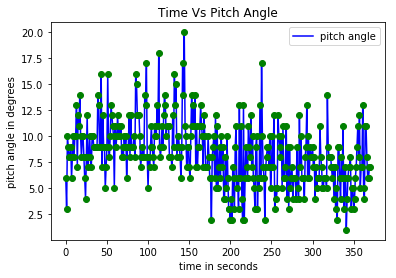

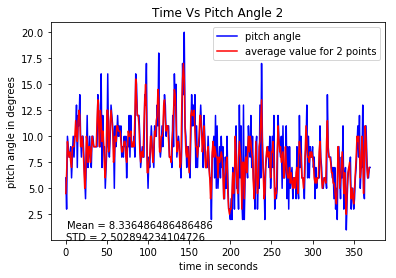

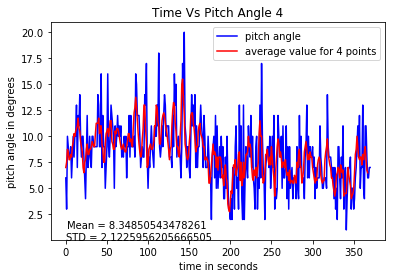

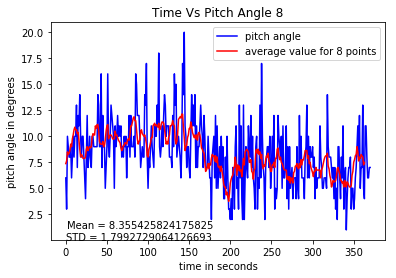

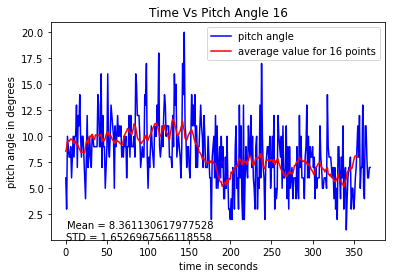

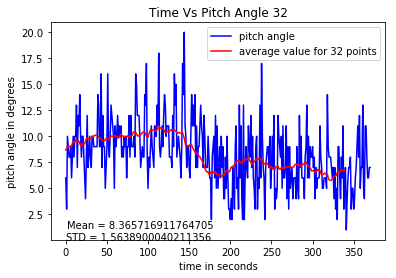

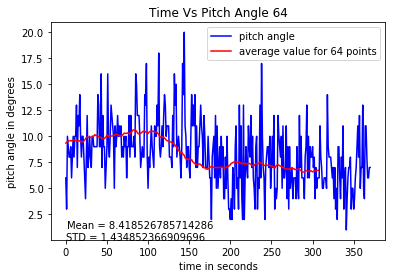

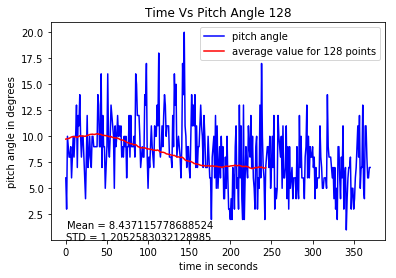

In [26]:
#runs the main function
if __name__ == "__main__":
    main()